# 01.01 - PROYECTO KAGGLE

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


## download data directly from Kaggle

- create a file `kaggle.json` with your authentication token (in kaggle $\to$ click user icon on top-right $\to$ settings $\to$ API create new token)
- upload it to this notebook workspace
- run the following cell

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

 84% 17.0M/20.1M [00:00<00:00, 61.7MB/s]
100% 20.1M/20.1M [00:00<00:00, 60.5MB/s]


## unzip and inspect data

In [ ]:
!unzip udea*.zip > /dev/null

In [ ]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


## Cargar `train.csv` con pandas



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("train.csv")
print ("shape of loaded dataframe", data.shape)


shape of loaded dataframe (692500, 12)


In [ ]:
data.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [ ]:
# Calcular el número de valores faltantes por cada columna
missing_values_count = data.isnull().sum()

# Filtrar solo las columnas que tienen valores faltantes
missing_values = missing_values_count[missing_values_count > 0]

# Calcular el porcentaje de valores faltantes para cada columna
missing_percentage = (missing_values / len(data)) * 100

# Combinar los resultados en un DataFrame para una visualización más clara
missing_data_info = pd.DataFrame({'Valores Faltantes': missing_values, 'Porcentaje': missing_percentage})

print("Variables con valores faltantes y su porcentaje:")
print(missing_data_info)

Variables con valores faltantes y su porcentaje:
                                Valores Faltantes  Porcentaje
ESTU_VALORMATRICULAUNIVERSIDAD               6287    0.907870
ESTU_HORASSEMANATRABAJA                     30857    4.455884
FAMI_ESTRATOVIVIENDA                        32137    4.640722
FAMI_TIENEINTERNET                          26629    3.845343
FAMI_EDUCACIONPADRE                         23178    3.347004
FAMI_EDUCACIONMADRE                         23664    3.417184
ESTU_PAGOMATRICULAPROPIO                     6498    0.938339


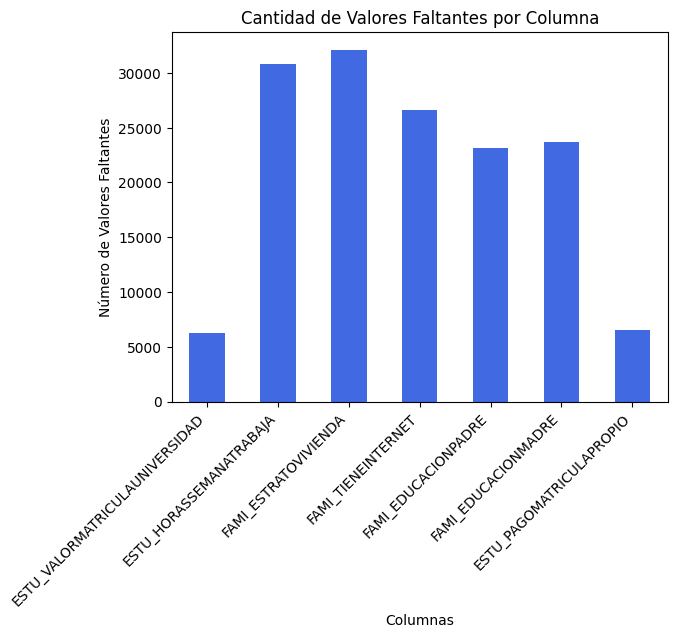

In [ ]:
# Crear un histograma de los valores faltantes
missing_values.plot(kind='bar', color='royalblue')
plt.title('Cantidad de Valores Faltantes por Columna')
plt.xlabel('Columnas')
plt.ylabel('Número de Valores Faltantes')
plt.xticks(rotation=45, ha='right')
plt.show()

**Organizando Datos de ESTU_VALORMATRICULAUNIVERSIDAD**

In [ ]:
data.ESTU_VALORMATRICULAUNIVERSIDAD.values[data.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'
sum(data.ESTU_VALORMATRICULAUNIVERSIDAD.isna())

0

In [ ]:
cmap = {'Entre 1 millón y menos de 2.5 millones': 1.75,
 'Entre 2.5 millones y menos de 4 millones': 3.25,
 'Menos de 500 mil': .250,
 'Entre 500 mil y menos de 1 millón': .75,
 'Entre 4 millones y menos de 5.5 millones': 4.75,
 'Más de 7 millones': 7.75,
 'Entre 5.5 millones y menos de 7 millones': 6.25,
 'No pagó matrícula': 0,
 'no info': -1}

data.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[cmap[i] for i in data.ESTU_VALORMATRICULAUNIVERSIDAD]]
data.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
1.75,204048
3.25,127430
0.25,80263
0.75,78704
4.75,69736
7.75,68014
6.25,38490
0.00,19528
-1.00,6287


**Organizando Datos de FAMI_EDUCACIONMADRE**

In [ ]:
data = data.copy()
data.FAMI_EDUCACIONMADRE = data.FAMI_EDUCACIONMADRE.fillna('no info')
data.FAMI_EDUCACIONMADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in data.FAMI_EDUCACIONMADRE.values]
value_counts = data.FAMI_EDUCACIONMADRE.value_counts()
print(value_counts)

FAMI_EDUCACIONMADRE
Secundaria (Bachillerato) completa      141744
Primaria incompleta                      99420
Técnica o tecnológica completa           89542
Educación profesional completa           85326
Secundaria (Bachillerato) incompleta     81012
Primaria completa                        56125
Postgrado                                46246
no info                                  28599
Técnica o tecnológica incompleta         27533
Educación profesional incompleta         22470
Ninguno                                  14483
Name: count, dtype: int64


In [ ]:
x = data.FAMI_EDUCACIONMADRE.values
FAMI_EDUCACIONMADRE_vals = sorted(np.unique(x))
FAMI_EDUCACIONMADRE_onehot_vals = {val: np.eye(len(FAMI_EDUCACIONMADRE_vals))[i] for i,val in enumerate(FAMI_EDUCACIONMADRE_vals)}
FAMI_EDUCACIONMADRE_onehot_vals

{'Educación profesional completa': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Educación profesional incompleta': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Ninguno': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Postgrado': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'Primaria completa': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'Primaria incompleta': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) completa': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) incompleta': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'Técnica o tecnológica completa': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'Técnica o tecnológica incompleta': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'no info': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

In [ ]:
FAMI_EDUCACIONMADRE_onehot_enc = np.r_[[FAMI_EDUCACIONMADRE_onehot_vals[i] for i in data.FAMI_EDUCACIONMADRE]]
FAMI_EDUCACIONMADRE_onehot_enc

FAMI_EDUCACIONMADRE_df = pd.DataFrame(FAMI_EDUCACIONMADRE_onehot_enc, columns=[f"FAMI_EDUCACIONMADRE__{v}" for v in FAMI_EDUCACIONMADRE_onehot_vals])
FAMI_EDUCACIONMADRE_df

data = pd.concat([FAMI_EDUCACIONMADRE_df, data], axis=1).drop('FAMI_EDUCACIONMADRE', axis=1)
data.shape

(692500, 22)

**Organizando Datos de FAMI_EDUCACIONPADRE**

In [ ]:
data = data.copy()
data.FAMI_EDUCACIONPADRE = data.FAMI_EDUCACIONPADRE.fillna('no info')
data.FAMI_EDUCACIONPADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in data.FAMI_EDUCACIONPADRE.values]
value_counts = data.FAMI_EDUCACIONPADRE.value_counts()
print(value_counts)

FAMI_EDUCACIONPADRE
Secundaria (Bachillerato) completa      128289
Primaria incompleta                     125675
Educación profesional completa           83117
Secundaria (Bachillerato) incompleta     71654
Técnica o tecnológica completa           62995
Primaria completa                        55958
no info                                  48999
Postgrado                                44169
Educación profesional incompleta         27084
Técnica o tecnológica incompleta         22552
Ninguno                                  22008
Name: count, dtype: int64


In [ ]:
xp = data.FAMI_EDUCACIONPADRE.values
FAMI_EDUCACIONPADRE_vals = sorted(np.unique(xp))
FAMI_EDUCACIONPADRE_onehot_vals = {val: np.eye(len(FAMI_EDUCACIONPADRE_vals))[i] for i,val in enumerate(FAMI_EDUCACIONPADRE_vals)}
FAMI_EDUCACIONPADRE_onehot_vals

{'Educación profesional completa': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Educación profesional incompleta': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Ninguno': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Postgrado': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'Primaria completa': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'Primaria incompleta': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) completa': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) incompleta': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'Técnica o tecnológica completa': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'Técnica o tecnológica incompleta': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'no info': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

In [ ]:
FAMI_EDUCACIONPADRE_onehot_enc = np.r_[[FAMI_EDUCACIONPADRE_onehot_vals[i] for i in data.FAMI_EDUCACIONPADRE]]
FAMI_EDUCACIONPADRE_onehot_enc

FAMI_EDUCACIONPADRE_df = pd.DataFrame(FAMI_EDUCACIONPADRE_onehot_enc, columns=[f"FAMI_EDUCACIONPADRE__{v}" for v in FAMI_EDUCACIONPADRE_onehot_vals])
FAMI_EDUCACIONPADRE_df

data = pd.concat([FAMI_EDUCACIONPADRE_df, data], axis=1).drop('FAMI_EDUCACIONPADRE', axis=1)
data.shape

(692500, 32)

**Organizando Datos de FAMI_ESTRATOVIVIENDA**

In [ ]:
data.FAMI_ESTRATOVIVIENDA.value_counts(dropna=False)

,count
FAMI_ESTRATOVIVIENDA,
Estrato 2,232671
Estrato 3,210685
Estrato 1,111991
Estrato 4,65514
NaN,32137
Estrato 5,23608
Estrato 6,12605
Sin Estrato,3289


In [ ]:
data.FAMI_ESTRATOVIVIENDA.values[data.FAMI_ESTRATOVIVIENDA.isna()] = 'Sin Estrato'
sum(data.FAMI_ESTRATOVIVIENDA.isna())

0

In [ ]:
estrato_map = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'Sin Estrato': -1  # Para manejar el caso de 'no info' si existe
}

data.FAMI_ESTRATOVIVIENDA = np.r_[[estrato_map[i] for i in data.FAMI_ESTRATOVIVIENDA]]
data.FAMI_ESTRATOVIVIENDA.value_counts(dropna=False)


,count
FAMI_ESTRATOVIVIENDA,
2,232671
3,210685
1,111991
4,65514
-1,35426
5,23608
6,12605


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Filtramos los datos donde la columna de matrícula no sea -1
data_filtrada = data[(data['ESTU_VALORMATRICULAUNIVERSIDAD'] != -1)]

# Seleccionamos las columnas de educación de la madre, padre, y matrícula universitaria
columnas_educacion_madre_padre = [
    'FAMI_EDUCACIONMADRE__Educación profesional completa',
    'FAMI_EDUCACIONMADRE__Educación profesional incompleta',
    'FAMI_EDUCACIONMADRE__Ninguno',
    'FAMI_EDUCACIONMADRE__Postgrado',
    'FAMI_EDUCACIONMADRE__Primaria completa',
    'FAMI_EDUCACIONMADRE__Primaria incompleta',
    'FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) completa',
    'FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta',
    'FAMI_EDUCACIONMADRE__Técnica o tecnológica completa',
    'FAMI_EDUCACIONMADRE__Técnica o tecnológica incompleta',
    'FAMI_EDUCACIONMADRE__no info',
    'FAMI_EDUCACIONPADRE__Educación profesional completa',
    'FAMI_EDUCACIONPADRE__Educación profesional incompleta',
    'FAMI_EDUCACIONPADRE__Ninguno',
    'FAMI_EDUCACIONPADRE__Postgrado',
    'FAMI_EDUCACIONPADRE__Primaria completa',
    'FAMI_EDUCACIONPADRE__Primaria incompleta',
    'FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) completa',
    'FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) incompleta',
    'FAMI_EDUCACIONPADRE__Técnica o tecnológica completa',
    'FAMI_EDUCACIONPADRE__Técnica o tecnológica incompleta',
    'FAMI_EDUCACIONPADRE__no info'
]

# Aseguramos que las columnas sean numéricas para KNN
data_filtrada.loc[:, columnas_educacion_madre_padre] = data_filtrada[columnas_educacion_madre_padre].apply(pd.to_numeric, errors='coerce')

# Filtramos los datos donde 'FAMI_ESTRATOVIVIENDA' es -1 (solo los estratos desconocidos)
data_filtrada_imputar = data_filtrada[data_filtrada['FAMI_ESTRATOVIVIENDA'] == -1]

# Usamos KNN para imputar los valores faltantes en la columna 'FAMI_ESTRATOVIVIENDA'
knn_imputer = KNNImputer(n_neighbors=20)

# Imputamos solo las filas donde 'FAMI_ESTRATOVIVIENDA' es -1
data_filtrada_imputar['FAMI_ESTRATOVIVIENDA'] = knn_imputer.fit_transform(
    data_filtrada_imputar[columnas_educacion_madre_padre + ['ESTU_VALORMATRICULAUNIVERSIDAD']]
)

# Ahora actualizamos el DataFrame original con los valores imputados
data_filtrada.update(data_filtrada_imputar)

<ipython-input-20-e9522693657d>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada_imputar['FAMI_ESTRATOVIVIENDA'] = knn_imputer.fit_transform(


In [ ]:
# Reemplazo los valores imputados a FAMI_ESTRATOVIVIENDA de data
data.loc[data['FAMI_ESTRATOVIVIENDA'] == -1, 'FAMI_ESTRATOVIVIENDA'] = data_filtrada_imputar['FAMI_ESTRATOVIVIENDA']

In [ ]:
data['FAMI_ESTRATOVIVIENDA'].value_counts(dropna=False)

,count
FAMI_ESTRATOVIVIENDA,
2.0,232671
3.0,210685
1.0,113398
4.0,65514
0.0,32125
5.0,23608
6.0,12605
NaN,1894


**Organizando Datos de  FAMI_TIENEINTERNET**

In [ ]:
# Calcular la moda de FAMI_TIENEINTERNET para cada estrato
mode_internet_by_stratum = data.groupby('FAMI_ESTRATOVIVIENDA')['FAMI_TIENEINTERNET'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

def impute_internet(row):
    if pd.isna(row['FAMI_TIENEINTERNET']):
        return mode_internet_by_stratum.get(row['FAMI_ESTRATOVIVIENDA'], row['FAMI_TIENEINTERNET'])
    return row['FAMI_TIENEINTERNET']

# Imputar valores NaN en FAMI_TIENEINTERNET basándose en FAMI_ESTRATOVIVIENDA
data['FAMI_TIENEINTERNET'] = data.apply(impute_internet, axis=1)

In [ ]:
data.FAMI_TIENEINTERNET.value_counts(dropna=False)

,count
FAMI_TIENEINTERNET,
Si,617457
No,73357
NaN,1686


**Organizando Datos de ESTU_HORASSEMANATRABAJA**

In [ ]:
data.ESTU_HORASSEMANATRABAJA.values[data.ESTU_HORASSEMANATRABAJA.isna()] = 'no info'
sum(data.ESTU_HORASSEMANATRABAJA.isna())

0

In [ ]:
# Definir el diccionario de mapeo
map_horassemanatrabaja = {
    '0': 0,
    'Más de 30 horas': 30,
    'Entre 21 y 30 horas': 25,
    'Entre 11 y 20 horas': 15,
    'Menos de 10 horas': 5,
    'no info': -1,
}

data.ESTU_HORASSEMANATRABAJA = np.r_[[map_horassemanatrabaja[i] for i in data.ESTU_HORASSEMANATRABAJA]]
data.ESTU_HORASSEMANATRABAJA.value_counts(dropna=False)

,count
ESTU_HORASSEMANATRABAJA,
30,249352
0,116550
15,115857
25,92693
5,87191
-1,30857


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Definir los valores válidos
valores_validos = [0, 5, 15, 25, 30]

# Filtramos los datos donde 'ESTU_HORASSEMANATRABAJA' es -1 para la imputación
data_filtrada = data[data['ESTU_HORASSEMANATRABAJA'] != -1]

# Imputación de los valores faltantes
knn_imputer = KNNImputer(n_neighbors=20)
data['ESTU_HORASSEMANATRABAJA'] = knn_imputer.fit_transform(data[['ESTU_HORASSEMANATRABAJA']])

# Aseguramos que los valores imputados estén entre los valores válidos (0, 5, 15, 25, 30)
data['ESTU_HORASSEMANATRABAJA'] = data['ESTU_HORASSEMANATRABAJA'].apply(lambda x: min(valores_validos, key=lambda y: abs(y - x)))

In [ ]:
data.ESTU_HORASSEMANATRABAJA.value_counts(dropna=False)

,count
ESTU_HORASSEMANATRABAJA,
30,249352
0,147407
15,115857
25,92693
5,87191


**Organizando Datos de ESTU_PAGOMATRICULAPROPIO**

In [ ]:
data.ESTU_PAGOMATRICULAPROPIO.value_counts(dropna=False)

,count
ESTU_PAGOMATRICULAPROPIO,
No,382201
Si,303801
NaN,6498


In [ ]:
# Definir la función de imputación
def imputar_pagomatriculaproprio(horas_semanas):
    if horas_semanas in [30.0, 25.0]:
        return 'Si'
    elif horas_semanas in [15.0, 5.0]:
        return 'No'
    else:
        return -1  # Para -1.0 o NaN

# Imputar valores en ESTU_PAGOMATRICULAPROPIO
data.ESTU_PAGOMATRICULAPROPIO = data.ESTU_PAGOMATRICULAPROPIO.fillna(
    data.ESTU_HORASSEMANATRABAJA.map(imputar_pagomatriculaproprio)
)


In [ ]:
data.ESTU_PAGOMATRICULAPROPIO.value_counts(dropna=False)

,count
ESTU_PAGOMATRICULAPROPIO,
No,383568
Si,306155
-1,2777


**Organizando ESTU_PRGM_ACADEMICO**

In [ ]:
# Definir las categorías y palabras clave
categories = {
    'Salud y Medicina': ['ENFERMERIA', 'MEDICINA', 'MEDICINA VETERINARIA', 'ODONTOLOGIA', 'FISIOTERAPIA', 'SALUD', 'ENFERMERÍA', 'QUIRURGICA', 'ZOOTECNIA', 'QUIMICA FARMACEUTICA', 'FARMACIA',
                         'BIOLOGIA','BIOLOGÍA', 'OCUPACIONAL', 'TERAPIA','BACTERIOLOGIA','LABORATORIO','OPTOMETRÍA','OPTOMETRIA', 'FONOAUDIOLOGIA', 'ODONTOLOGÍA','GERONTOLOGIA'],
    'Comunicación y Medios': ['COMUNICACION AUDIOVISUAL', 'MARKETING','AUDIOVISUALES', 'PROFESIONAL EN CINE Y TELEVISION','CINE','PUBLICITARIA','VISUAL','FOTOGRAFÍA','PRODUCCION','COMUNICACI¿¿N','ENTRETENIMIENTO',
                              'PRODUCCIÓN','DISE¿O CROSSMEDIA','ANIMACIÓN'],
    'Derecho': ['DERECHO'],
    'Administración y Negocios': ['ADMINISTRACION','ADMINISTRACI¿N','ADMINISTRACIÓN', 'NEGOCIOS', 'FINANZAS','INTERNACIONALES', 'COMERCIO', 'MERCADEO', 'PUBLICIDAD', 'ECONOMÍA','ECONOM¿A','ECONOMIA', 'LOGISTICA EMPRESARIAL',
                                  'GERENCIA','MERCADOLOGIA','RELACIONES','ADMINSITRACIÓN'],
    'Ciencias Sociales': ['SOCIAL','GOBIERNO','CIENCIA POLITICA','POLITICAS','POLÍTICO' 'RELACIONES INTERNACIONALES', 'JURISPRUDENCIA','POLÍTICA','SOCIOLOGIA','PERIODISMO','GESTION CULTURAL', 'SOCIOLOGÍA','TERRITORIAL',
                          'COMUNICACION','COMUNICACIÓN','CONFLICTOS'],
    'Ingeniería': ['INGENIERIA', 'INGENIERÍA', 'INGENIER¿A','INGENIERÌA','INGENIIERIA'],
    'Arquitectura': ['ARQUITECTURA','ARQUEOLOGIA'],
    'Contaduría': ['CONTADURÍA', 'CONTADURIA'],
    'Educación': ['MAESTRO', 'PEDAGOGÍA','FAMILIAR'],
    'Arte y Diseño': ['ARTES', 'DANZA', 'DISEÑO', 'ANTROPOLOGIA','ANTROPOLOGÍA','ESTUDIOS MUSICALES','MUSICA','MUSICAL','ARTE','MÚSICA','CULTURAL','DIRECCION DE BANDA','DISENO GRAFICO'],
    'Literatura': ['ESTUDIOS LITERARIOS','LITERATURA','LITERARIA','NARRATIVAS'],
    'Licenciatura': ['LICENCIATURA'],
    'Humanidades': ['FILOSOFIA','FILOSOFÍA', 'HUMANIDADES', 'PSICOLOGÍA','PSICOLOGIA','PSICÓLOGA', 'FILOLOGIA', 'TEOLOGIA','TEOLOGÍA', 'BIBLICAS', 'HISTORIA','RECREACION'],
    'Educación Física': ['EDUCACION FISICA', 'DEPORTES', 'DEPORTE','DEPORTIVO','DEPORTIVA'],
    'Idiomas': ['IDIOMAS', 'IDIOMA','INGLÉS','INGLES','ESPAÑOL', 'FRANCES', 'LENGUAS', 'LINGUISTICA'],
    'Turismo y Hospitalidad': ['HOTELERIA Y TURISMO', 'TURISMO','HOTELERA'],
    'Medio Ambiente': ['ECOLOGIA','GEOLOGIA','ACUICULTURA','AMBIENTALES','ECOLOGÍA'],
    'Ciencias Forenses y Criminalística': ['PROFESIONAL EN CRIMINALISTICA', 'CRIMINALISTICA','CRIMINAL'],
    'Ciencias de la Información': ['CIENCIAS DE LA INFORMACION Y LA DOCUMENTACION', 'ARCHIVISTICA','DOCUMENTACION', 'GESTION EMPRESARIAL',' SISTEMAS DE INFORMACIÓN'],
    'Ciencias Militares': ['CIENCIAS MILITARES', 'CIENCIAS NAVALES PARA OFICIALES DE INFANTERIA','NAVALES'],
    'Agronomía y Ciencias Agrarias': ['AGRONOMIA','AGROINDUSTRIAL','AGROINDUSTRIA'],
    'Construcción': ['CONSTRUCCION', 'CONSTRUCCIONES CIVILES','URBANISMO','URBANOS'],
    'Ciencias Exactas': ['MATEMATICAS', 'QUIMICA','QUÍMICA','QU¿MICA','FÍSICA','FISICA','ESTADISTICA','ESTADÍSTICA','MATEMÁTICA','ASTRONOMIA'],
    'Ciencias Gastronómicas': ['GASTRONOMIA','GASTRONOM¿A', 'CULINARIA Y GASTRONOMÍA', 'NUTRICION','NUTRICIÓN','GASTRONOMÍA'],
    'Ciencias de la Tierra': ['GEOLOGÍA', 'CIENCIAS DE LA TIERRA', 'GEOCIENCIAS', 'INGENIERÍA GEOLOGICA', 'GEOGRAFIA','GEOLOG¿A'],
    'Ciencias de la Computación y Tecnología': ['COMPUTACION', 'INFORMATICA', 'TECNOLOGÍA','BIOTECNOLOGIA','COMPUTACIÓN'],
    'Náutica y Ciencias Marítimas': ['CIENCIAS NAUTICAS', 'NÁUTICA', 'CIENCIAS MARÍTIMAS', 'NAVEGACIÓN MARÍTIMA','OCEANOGRAFÍA'],
    'Conservación y Restauración': ['CONSERVACION Y RESTAURACION DE BIENES MUEBLES']
}

# Función para categorizar programas
def categorize_program(program):
    for category, keywords in categories.items():
        if any(keyword in program.upper() for keyword in keywords):
            return category
    return 'Sin categoría'

# Aplicar la función al DataFrame
data['CATEGORIA'] = data['ESTU_PRGM_ACADEMICO'].apply(categorize_program)

# Contar cuántos programas fueron categorizados y cuántos quedaron sin categoría
category_counts = data['CATEGORIA'].value_counts()

print("\nConteo de categorías:")
print(category_counts)


Conteo de categorías:
CATEGORIA
Administración y Negocios                  147137
Ingeniería                                 142054
Salud y Medicina                            86457
Derecho                                     53840
Humanidades                                 53833
Contaduría                                  52860
Licenciatura                                49313
Ciencias Sociales                           41536
Arte y Diseño                               16318
Arquitectura                                11754
Comunicación y Medios                        8619
Educación                                    6560
Ciencias Exactas                             4035
Educación Física                             2970
Literatura                                   2610
Ciencias Gastronómicas                       2563
Idiomas                                      2332
Ciencias Militares                           1734
Medio Ambiente                               1554
Ciencias de la In

**Convertir variables categóricas a onehot**

In [ ]:
columnas_categoricas = ['ESTU_PRGM_DEPARTAMENTO', 'FAMI_TIENEINTERNET', 'ESTU_PAGOMATRICULAPROPIO', 'CATEGORIA']

# Inicializar un DataFrame vacío para almacenar los resultados
data_final = data.copy()

for col in columnas_categoricas:
    # Asegurarse de que los valores sean cadenas y manejar NaN
    col_values = data_final[col].fillna('No Info').astype(str).values
    unique_vals = sorted(np.unique(col_values))

    # Crear un diccionario para almacenar la codificación one-hot
    onehot_vals = {val: np.eye(len(unique_vals))[i] for i, val in enumerate(unique_vals)}

    # Codificar los datos en formato one-hot
    onehot_enc = np.r_[[onehot_vals[val] for val in col_values]]

    # Crear un DataFrame a partir de la codificación one-hot
    onehot_df = pd.DataFrame(onehot_enc, columns=[f"{col}__{v}" for v in unique_vals])

    # Concatenar el nuevo DataFrame con los datos originales y eliminar la columna original
    data_final = pd.concat([onehot_df, data_final], axis=1).drop(col, axis=1)

data_final.shape
data = data_final

**Elimino la columna ESTU_PRGM_ACADEMICO ya que tengo la CATEGORÍA**

In [ ]:
data = data.drop(columns=['ESTU_PRGM_ACADEMICO'])

# **Luego de la imputación de datos**

In [ ]:
# Calcular el número de valores -1 o NaN por cada columna
negative_one_count = (data == -1).sum() + data.isnull().sum()

# Filtrar solo las columnas que tienen valores -1
negative_one_count_filtered = negative_one_count[negative_one_count > 0]

# Calcular el porcentaje de valores -1 para cada columna
negative_one_percentage = (negative_one_count_filtered / len(data)) * 100

# Combinar los resultados en un DataFrame para una visualización más clara
negative_one_info = pd.DataFrame({'Valores -1': negative_one_count_filtered, 'Porcentaje': negative_one_percentage})

print("Variables con valores -1 y su porcentaje:")
print(negative_one_info)


Variables con valores -1 y su porcentaje:
Empty DataFrame
Columns: [Valores -1, Porcentaje]
Index: []


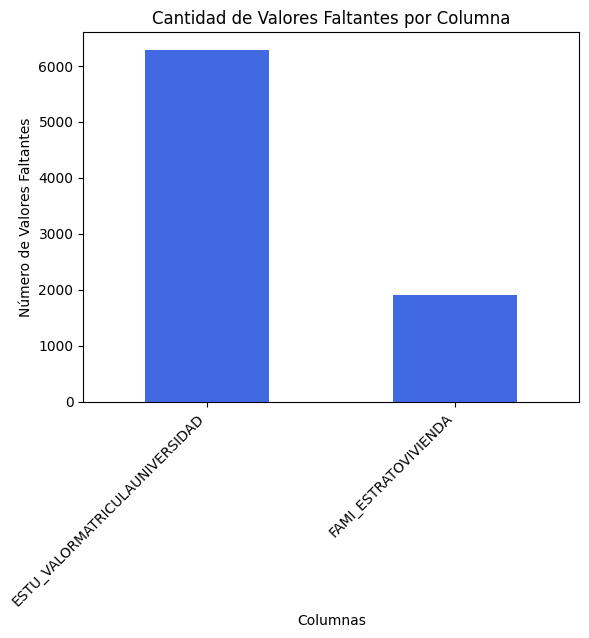

In [ ]:
# Crear un histograma de los valores faltantes
negative_one_count_filtered.plot(kind='bar', color='royalblue')
plt.title('Cantidad de Valores Faltantes por Columna')
plt.xlabel('Columnas')
plt.ylabel('Número de Valores Faltantes')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Filtramos los datos donde 'FAMI_ESTRATOVIVIENDA' no sea NaN
data_filtrada = data[data['FAMI_ESTRATOVIVIENDA'].notna()]

# Seleccionamos las columnas para la imputación
columnas_educacion_madre_padre_estrato = [
    'FAMI_EDUCACIONMADRE__Educación profesional completa',
    'FAMI_EDUCACIONMADRE__Educación profesional incompleta',
    'FAMI_EDUCACIONMADRE__Ninguno',
    'FAMI_EDUCACIONMADRE__Postgrado',
    'FAMI_EDUCACIONMADRE__Primaria completa',
    'FAMI_EDUCACIONMADRE__Primaria incompleta',
    'FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) completa',
    'FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta',
    'FAMI_EDUCACIONMADRE__Técnica o tecnológica completa',
    'FAMI_EDUCACIONMADRE__Técnica o tecnológica incompleta',
    'FAMI_EDUCACIONMADRE__no info',
    'FAMI_EDUCACIONPADRE__Educación profesional completa',
    'FAMI_EDUCACIONPADRE__Educación profesional incompleta',
    'FAMI_EDUCACIONPADRE__Ninguno',
    'FAMI_EDUCACIONPADRE__Postgrado',
    'FAMI_EDUCACIONPADRE__Primaria completa',
    'FAMI_EDUCACIONPADRE__Primaria incompleta',
    'FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) completa',
    'FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) incompleta',
    'FAMI_EDUCACIONPADRE__Técnica o tecnológica completa',
    'FAMI_EDUCACIONPADRE__Técnica o tecnológica incompleta',
    'FAMI_EDUCACIONPADRE__no info',
    'FAMI_ESTRATOVIVIENDA',  # Estrato de la vivienda
    'ESTU_VALORMATRICULAUNIVERSIDAD'  # Valor de la matrícula universitaria
]

# Aseguramos que las columnas sean numéricas
data[columnas_educacion_madre_padre_estrato] = data[columnas_educacion_madre_padre_estrato].apply(pd.to_numeric, errors='coerce')

# Filtramos las filas donde el valor de la matrícula es -1 (solo valores que queremos imputar)
data_a_imputar = data_filtrada[data_filtrada['ESTU_VALORMATRICULAUNIVERSIDAD'] == -1].copy()

# Concatenamos las filas que queremos imputar con las que tienen valores válidos para entrenamiento
data_para_imputacion = pd.concat([data_filtrada[data_filtrada['ESTU_VALORMATRICULAUNIVERSIDAD'] != -1], data_a_imputar])

# Aplicamos KNNImputer sobre las columnas seleccionadas
knn_imputer = KNNImputer(n_neighbors=20)
data_para_imputacion[columnas_educacion_madre_padre_estrato] = knn_imputer.fit_transform(data_para_imputacion[columnas_educacion_madre_padre_estrato])

# Solo actualizamos en el DataFrame original los valores de 'ESTU_VALORMATRICULAUNIVERSIDAD' que eran -1
data.loc[data_a_imputar.index, 'ESTU_VALORMATRICULAUNIVERSIDAD'] = data_para_imputacion.loc[data_a_imputar.index, 'ESTU_VALORMATRICULAUNIVERSIDAD']


In [ ]:
data_para_imputacion.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
1.75,204048
3.25,127430
0.25,80263
0.75,78704
4.75,69736
7.75,68014
6.25,38490
0.00,19528
-1.00,4393


**Los datos que son -1 se les toma la media de cada columna y se inserta este valor**

In [ ]:
# Especificar las columnas a procesar
columns_to_replace = ['FAMI_ESTRATOVIVIENDA', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA']

# Reemplazar los valores -1 y NaN con la media de cada columna
for column in columns_to_replace:
    # Calcula la media excluyendo los valores -1 y NaN
    mean_value = data[data[column] != -1][column].mean()

    # Reemplaza -1 y NaN con la media calculada
    data[column] = data[column].replace(-1, mean_value).fillna(mean_value)


# **Convertir RENDIMIENTO_GLOBAL EN VALORES DISCRETOS**

In [ ]:
y_col = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
data[y_col] = [rmap[i] for i in data[y_col]]
data.head()

,CATEGORIA__Administración y Negocios,CATEGORIA__Agronomía y Ciencias Agrarias,CATEGORIA__Arquitectura,CATEGORIA__Arte y Diseño,CATEGORIA__Ciencias Exactas,CATEGORIA__Ciencias Forenses y Criminalística,CATEGORIA__Ciencias Gastronómicas,CATEGORIA__Ciencias Militares,CATEGORIA__Ciencias Sociales,CATEGORIA__Ciencias de la Computación y Tecnología,...,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE__Técnica o tecnológica completa,FAMI_EDUCACIONMADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONMADRE__no info,ID,PERIODO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,RENDIMIENTO_GLOBAL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,904256,20212,6.25,5,3.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,645256,20212,3.25,0,3.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,308367,20203,3.25,30,3.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,470353,20195,4.75,0,4.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,989032,20212,3.25,25,3.0,1


# **Construyo x & y para entrenar el modelo**

In [ ]:
data_final = data_final.drop(columns=['ESTU_PRGM_ACADEMICO'])

In [ ]:
z = data_final
z = z[sorted(z.columns)]

X = z[[c for c in z.columns if c!=y_col]].values
y = z[y_col].values
X.shape, y.shape

((692500, 92), (692500,))

In [ ]:
from sklearn.model_selection import train_test_split
Xtr, Xts, ytr, yts = train_test_split(X,y, train_size=0.8)
Xtr.shape, Xts.shape, ytr.shape, yts.shape

((554000, 92), (138500, 92), (554000,), (138500,))

In [ ]:
# Verificar si hay NaN en Xtr
print("¿Xtr contiene NaN?", np.isnan(Xtr).any())

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
Xtr = imputer.fit_transform(Xtr)

¿Xtr contiene NaN? False


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gbc.fit(Xtr, ytr)

GradientBoostingClassifier(max_depth=5, n_estimators=300, random_state=42)

In [ ]:
print("¿Xts contiene NaN?", np.isnan(Xts).any())
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Estrategia: rellenar con la media
Xts = imputer.fit_transform(Xts)

¿Xts contiene NaN? False


In [ ]:
# Hacer predicciones
preds_tr = gbc.predict(Xtr)
preds_ts = gbc.predict(Xts)
np.mean(preds_tr==ytr), np.mean(preds_ts==yts)

(0.4412527075812274, 0.4217689530685921)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def procesar_datos(data):
    import pandas as pd
    data.ESTU_VALORMATRICULAUNIVERSIDAD.values[data.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'
    sum(data.ESTU_VALORMATRICULAUNIVERSIDAD.isna())

    cmap = {'Entre 1 millón y menos de 2.5 millones': 1.75,
    'Entre 2.5 millones y menos de 4 millones': 3.25,
    'Menos de 500 mil': .250,
    'Entre 500 mil y menos de 1 millón': .75,
    'Entre 4 millones y menos de 5.5 millones': 4.75,
    'Más de 7 millones': 7.75,
    'Entre 5.5 millones y menos de 7 millones': 6.25,
    'No pagó matrícula': 0,
    'no info': -1}

    data.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[cmap[i] for i in data.ESTU_VALORMATRICULAUNIVERSIDAD]]
    data.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()

    data = data.copy()
    data.FAMI_EDUCACIONMADRE = data.FAMI_EDUCACIONMADRE.fillna('no info')
    data.FAMI_EDUCACIONMADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in data.FAMI_EDUCACIONMADRE.values]
    #value_counts = data.FAMI_EDUCACIONMADRE.value_counts()

    x = data.FAMI_EDUCACIONMADRE.values
    FAMI_EDUCACIONMADRE_vals = sorted(np.unique(x))
    FAMI_EDUCACIONMADRE_onehot_vals = {val: np.eye(len(FAMI_EDUCACIONMADRE_vals))[i] for i,val in enumerate(FAMI_EDUCACIONMADRE_vals)}
    FAMI_EDUCACIONMADRE_onehot_vals

    FAMI_EDUCACIONMADRE_onehot_enc = np.r_[[FAMI_EDUCACIONMADRE_onehot_vals[i] for i in data.FAMI_EDUCACIONMADRE]]
    FAMI_EDUCACIONMADRE_onehot_enc

    FAMI_EDUCACIONMADRE_df = pd.DataFrame(FAMI_EDUCACIONMADRE_onehot_enc, columns=[f"FAMI_EDUCACIONMADRE__{v}" for v in FAMI_EDUCACIONMADRE_onehot_vals])
    FAMI_EDUCACIONMADRE_df

    data = pd.concat([FAMI_EDUCACIONMADRE_df, data], axis=1).drop('FAMI_EDUCACIONMADRE', axis=1)
    data.shape

    #data = data.copy()
    data.FAMI_EDUCACIONPADRE = data.FAMI_EDUCACIONPADRE.fillna('no info')
    data.FAMI_EDUCACIONPADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in data.FAMI_EDUCACIONPADRE.values]
    xp = data.FAMI_EDUCACIONPADRE.values
    FAMI_EDUCACIONPADRE_vals = sorted(np.unique(xp))
    FAMI_EDUCACIONPADRE_onehot_vals = {val: np.eye(len(FAMI_EDUCACIONPADRE_vals))[i] for i,val in enumerate(FAMI_EDUCACIONPADRE_vals)}
    FAMI_EDUCACIONPADRE_onehot_vals

    FAMI_EDUCACIONPADRE_onehot_enc = np.r_[[FAMI_EDUCACIONPADRE_onehot_vals[i] for i in data.FAMI_EDUCACIONPADRE]]
    FAMI_EDUCACIONPADRE_onehot_enc

    FAMI_EDUCACIONPADRE_df = pd.DataFrame(FAMI_EDUCACIONPADRE_onehot_enc, columns=[f"FAMI_EDUCACIONPADRE__{v}" for v in FAMI_EDUCACIONPADRE_onehot_vals])
    FAMI_EDUCACIONPADRE_df

    data = pd.concat([FAMI_EDUCACIONPADRE_df, data], axis=1).drop('FAMI_EDUCACIONPADRE', axis=1)
    data.shape

    data.FAMI_ESTRATOVIVIENDA.value_counts(dropna=False)
    data.FAMI_ESTRATOVIVIENDA.values[data.FAMI_ESTRATOVIVIENDA.isna()] = 'Sin Estrato'
    sum(data.FAMI_ESTRATOVIVIENDA.isna())

    estrato_map = {
        'Estrato 1': 1,
        'Estrato 2': 2,
        'Estrato 3': 3,
        'Estrato 4': 4,
        'Estrato 5': 5,
        'Estrato 6': 6,
        'Sin Estrato': -1  # Para manejar el caso de 'no info' si existe
    }

    data.FAMI_ESTRATOVIVIENDA = np.r_[[estrato_map[i] for i in data.FAMI_ESTRATOVIVIENDA]]
    data.FAMI_ESTRATOVIVIENDA.value_counts(dropna=False)

    import pandas as pd
    from sklearn.impute import KNNImputer

    # Filtramos los datos donde la columna de matrícula no sea -1
    data_filtrada = data[(data['ESTU_VALORMATRICULAUNIVERSIDAD'] != -1)]

    # Seleccionamos las columnas de educación de la madre, padre, y matrícula universitaria
    columnas_educacion_madre_padre = [
        'FAMI_EDUCACIONMADRE__Educación profesional completa',
        'FAMI_EDUCACIONMADRE__Educación profesional incompleta',
        'FAMI_EDUCACIONMADRE__Ninguno',
        'FAMI_EDUCACIONMADRE__Postgrado',
        'FAMI_EDUCACIONMADRE__Primaria completa',
        'FAMI_EDUCACIONMADRE__Primaria incompleta',
        'FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) completa',
        'FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta',
        'FAMI_EDUCACIONMADRE__Técnica o tecnológica completa',
        'FAMI_EDUCACIONMADRE__Técnica o tecnológica incompleta',
        'FAMI_EDUCACIONMADRE__no info',
        'FAMI_EDUCACIONPADRE__Educación profesional completa',
        'FAMI_EDUCACIONPADRE__Educación profesional incompleta',
        'FAMI_EDUCACIONPADRE__Ninguno',
        'FAMI_EDUCACIONPADRE__Postgrado',
        'FAMI_EDUCACIONPADRE__Primaria completa',
        'FAMI_EDUCACIONPADRE__Primaria incompleta',
        'FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) completa',
        'FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) incompleta',
        'FAMI_EDUCACIONPADRE__Técnica o tecnológica completa',
        'FAMI_EDUCACIONPADRE__Técnica o tecnológica incompleta',
        'FAMI_EDUCACIONPADRE__no info'
    ]

    # Aseguramos que las columnas sean numéricas para KNN
    data_filtrada.loc[:, columnas_educacion_madre_padre] = data_filtrada[columnas_educacion_madre_padre].apply(pd.to_numeric, errors='coerce')

    # Filtramos los datos donde 'FAMI_ESTRATOVIVIENDA' es -1 (solo los estratos desconocidos)
    data_filtrada_imputar = data_filtrada[data_filtrada['FAMI_ESTRATOVIVIENDA'] == -1]

    # Usamos KNN para imputar los valores faltantes en la columna 'FAMI_ESTRATOVIVIENDA'
    knn_imputer = KNNImputer(n_neighbors=20)

    # Imputamos solo las filas donde 'FAMI_ESTRATOVIVIENDA' es -1
    data_filtrada_imputar['FAMI_ESTRATOVIVIENDA'] = knn_imputer.fit_transform(
        data_filtrada_imputar[columnas_educacion_madre_padre + ['ESTU_VALORMATRICULAUNIVERSIDAD']]
    )

    # Ahora actualizamos el DataFrame original con los valores imputados
    data_filtrada.update(data_filtrada_imputar)

    # Reemplazo los valores imputados a FAMI_ESTRATOVIVIENDA de data
    data.loc[data['FAMI_ESTRATOVIVIENDA'] == -1, 'FAMI_ESTRATOVIVIENDA'] = data_filtrada_imputar['FAMI_ESTRATOVIVIENDA']

    data['FAMI_ESTRATOVIVIENDA'].value_counts(dropna=False)

    # Calcular la moda de FAMI_TIENEINTERNET para cada estrato
    mode_internet_by_stratum = data.groupby('FAMI_ESTRATOVIVIENDA')['FAMI_TIENEINTERNET'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

    def impute_internet(row):
        if pd.isna(row['FAMI_TIENEINTERNET']):
            return mode_internet_by_stratum.get(row['FAMI_ESTRATOVIVIENDA'], row['FAMI_TIENEINTERNET'])
        return row['FAMI_TIENEINTERNET']

    # Imputar valores NaN en FAMI_TIENEINTERNET basándose en FAMI_ESTRATOVIVIENDA
    data['FAMI_TIENEINTERNET'] = data.apply(impute_internet, axis=1)

    data.FAMI_TIENEINTERNET.value_counts(dropna=False)

    data.ESTU_HORASSEMANATRABAJA.values[data.ESTU_HORASSEMANATRABAJA.isna()] = 'no info'
    sum(data.ESTU_HORASSEMANATRABAJA.isna())

    # Definir el diccionario de mapeo
    map_horassemanatrabaja = {
        '0': 0,
        'Más de 30 horas': 30,
        'Entre 21 y 30 horas': 25,
        'Entre 11 y 20 horas': 15,
        'Menos de 10 horas': 5,
        'no info': -1,
    }

    data.ESTU_HORASSEMANATRABAJA = np.r_[[map_horassemanatrabaja[i] for i in data.ESTU_HORASSEMANATRABAJA]]
    data.ESTU_HORASSEMANATRABAJA.value_counts(dropna=False)

    import pandas as pd
    from sklearn.impute import KNNImputer

    # Definir los valores válidos
    valores_validos = [0, 5, 15, 25, 30]

    # Filtramos los datos donde 'ESTU_HORASSEMANATRABAJA' es -1 para la imputación
    data_filtrada = data[data['ESTU_HORASSEMANATRABAJA'] != -1]

    # Imputación de los valores faltantes
    knn_imputer = KNNImputer(n_neighbors=20)
    data['ESTU_HORASSEMANATRABAJA'] = knn_imputer.fit_transform(data[['ESTU_HORASSEMANATRABAJA']])

    # Aseguramos que los valores imputados estén entre los valores válidos (0, 5, 15, 25, 30)
    data['ESTU_HORASSEMANATRABAJA'] = data['ESTU_HORASSEMANATRABAJA'].apply(lambda x: min(valores_validos, key=lambda y: abs(y - x)))

    data.ESTU_HORASSEMANATRABAJA.value_counts(dropna=False)

    # Definir la función de imputación
    def imputar_pagomatriculaproprio(horas_semanas):
        if horas_semanas in [30.0, 25.0]:
            return 'Si'
        elif horas_semanas in [15.0, 5.0]:
            return 'No'
        else:
            return -1  # Para -1.0 o NaN

    # Imputar valores en ESTU_PAGOMATRICULAPROPIO
    data.ESTU_PAGOMATRICULAPROPIO = data.ESTU_PAGOMATRICULAPROPIO.fillna(
        data.ESTU_HORASSEMANATRABAJA.map(imputar_pagomatriculaproprio)
    )

    data.ESTU_PAGOMATRICULAPROPIO.value_counts(dropna=False)

    # Definir las categorías y palabras clave
    categories = {
        'Salud y Medicina': ['ENFERMERIA', 'MEDICINA', 'MEDICINA VETERINARIA', 'ODONTOLOGIA', 'FISIOTERAPIA', 'SALUD', 'ENFERMERÍA', 'QUIRURGICA', 'ZOOTECNIA', 'QUIMICA FARMACEUTICA', 'FARMACIA',
                            'BIOLOGIA','BIOLOGÍA', 'OCUPACIONAL', 'TERAPIA','BACTERIOLOGIA','LABORATORIO','OPTOMETRÍA','OPTOMETRIA', 'FONOAUDIOLOGIA', 'ODONTOLOGÍA','GERONTOLOGIA'],
        'Comunicación y Medios': ['COMUNICACION AUDIOVISUAL', 'MARKETING','AUDIOVISUALES', 'PROFESIONAL EN CINE Y TELEVISION','CINE','PUBLICITARIA','VISUAL','FOTOGRAFÍA','PRODUCCION','COMUNICACI¿¿N','ENTRETENIMIENTO',
                                'PRODUCCIÓN','DISE¿O CROSSMEDIA','ANIMACIÓN'],
        'Derecho': ['DERECHO'],
        'Administración y Negocios': ['ADMINISTRACION','ADMINISTRACI¿N','ADMINISTRACIÓN', 'NEGOCIOS', 'FINANZAS','INTERNACIONALES', 'COMERCIO', 'MERCADEO', 'PUBLICIDAD', 'ECONOMÍA','ECONOM¿A','ECONOMIA', 'LOGISTICA EMPRESARIAL',
                                    'GERENCIA','MERCADOLOGIA','RELACIONES','ADMINSITRACIÓN'],
        'Ciencias Sociales': ['SOCIAL','GOBIERNO','CIENCIA POLITICA','POLITICAS','POLÍTICO' 'RELACIONES INTERNACIONALES', 'JURISPRUDENCIA','POLÍTICA','SOCIOLOGIA','PERIODISMO','GESTION CULTURAL', 'SOCIOLOGÍA','TERRITORIAL',
                            'COMUNICACION','COMUNICACIÓN','CONFLICTOS'],
        'Ingeniería': ['INGENIERIA', 'INGENIERÍA', 'INGENIER¿A','INGENIERÌA','INGENIIERIA'],
        'Arquitectura': ['ARQUITECTURA','ARQUEOLOGIA'],
        'Contaduría': ['CONTADURÍA', 'CONTADURIA'],
        'Educación': ['MAESTRO', 'PEDAGOGÍA','FAMILIAR'],
        'Arte y Diseño': ['ARTES', 'DANZA', 'DISEÑO', 'ANTROPOLOGIA','ANTROPOLOGÍA','ESTUDIOS MUSICALES','MUSICA','MUSICAL','ARTE','MÚSICA','CULTURAL','DIRECCION DE BANDA','DISENO GRAFICO'],
        'Literatura': ['ESTUDIOS LITERARIOS','LITERATURA','LITERARIA','NARRATIVAS'],
        'Licenciatura': ['LICENCIATURA'],
        'Humanidades': ['FILOSOFIA','FILOSOFÍA', 'HUMANIDADES', 'PSICOLOGÍA','PSICOLOGIA','PSICÓLOGA', 'FILOLOGIA', 'TEOLOGIA','TEOLOGÍA', 'BIBLICAS', 'HISTORIA','RECREACION'],
        'Educación Física': ['EDUCACION FISICA', 'DEPORTES', 'DEPORTE','DEPORTIVO','DEPORTIVA'],
        'Idiomas': ['IDIOMAS', 'IDIOMA','INGLÉS','INGLES','ESPAÑOL', 'FRANCES', 'LENGUAS', 'LINGUISTICA'],
        'Turismo y Hospitalidad': ['HOTELERIA Y TURISMO', 'TURISMO','HOTELERA'],
        'Medio Ambiente': ['ECOLOGIA','GEOLOGIA','ACUICULTURA','AMBIENTALES','ECOLOGÍA'],
        'Ciencias Forenses y Criminalística': ['PROFESIONAL EN CRIMINALISTICA', 'CRIMINALISTICA','CRIMINAL'],
        'Ciencias de la Información': ['CIENCIAS DE LA INFORMACION Y LA DOCUMENTACION', 'ARCHIVISTICA','DOCUMENTACION', 'GESTION EMPRESARIAL',' SISTEMAS DE INFORMACIÓN'],
        'Ciencias Militares': ['CIENCIAS MILITARES', 'CIENCIAS NAVALES PARA OFICIALES DE INFANTERIA','NAVALES'],
        'Agronomía y Ciencias Agrarias': ['AGRONOMIA','AGROINDUSTRIAL','AGROINDUSTRIA'],
        'Construcción': ['CONSTRUCCION', 'CONSTRUCCIONES CIVILES','URBANISMO','URBANOS'],
        'Ciencias Exactas': ['MATEMATICAS', 'QUIMICA','QUÍMICA','QU¿MICA','FÍSICA','FISICA','ESTADISTICA','ESTADÍSTICA','MATEMÁTICA','ASTRONOMIA'],
        'Ciencias Gastronómicas': ['GASTRONOMIA','GASTRONOM¿A', 'CULINARIA Y GASTRONOMÍA', 'NUTRICION','NUTRICIÓN','GASTRONOMÍA'],
        'Ciencias de la Tierra': ['GEOLOGÍA', 'CIENCIAS DE LA TIERRA', 'GEOCIENCIAS', 'INGENIERÍA GEOLOGICA', 'GEOGRAFIA','GEOLOG¿A'],
        'Ciencias de la Computación y Tecnología': ['COMPUTACION', 'INFORMATICA', 'TECNOLOGÍA','BIOTECNOLOGIA','COMPUTACIÓN'],
        'Náutica y Ciencias Marítimas': ['CIENCIAS NAUTICAS', 'NÁUTICA', 'CIENCIAS MARÍTIMAS', 'NAVEGACIÓN MARÍTIMA','OCEANOGRAFÍA'],
        'Conservación y Restauración': ['CONSERVACION Y RESTAURACION DE BIENES MUEBLES']
    }

    # Función para categorizar programas
    def categorize_program(program):
        for category, keywords in categories.items():
            if any(keyword in program.upper() for keyword in keywords):
                return category
        return 'Sin categoría'

    # Aplicar la función al DataFrame
    data['CATEGORIA'] = data['ESTU_PRGM_ACADEMICO'].apply(categorize_program)

    columnas_categoricas = ['ESTU_PRGM_DEPARTAMENTO', 'FAMI_TIENEINTERNET', 'ESTU_PAGOMATRICULAPROPIO', 'CATEGORIA']

    # Inicializar un DataFrame vacío para almacenar los resultados
    data_final = data.copy()

    for col in columnas_categoricas:
        # Asegurarse de que los valores sean cadenas y manejar NaN
        col_values = data_final[col].fillna('No Info').astype(str).values
        unique_vals = sorted(np.unique(col_values))

        # Crear un diccionario para almacenar la codificación one-hot
        onehot_vals = {val: np.eye(len(unique_vals))[i] for i, val in enumerate(unique_vals)}

        # Codificar los datos en formato one-hot
        onehot_enc = np.r_[[onehot_vals[val] for val in col_values]]

        # Crear un DataFrame a partir de la codificación one-hot
        onehot_df = pd.DataFrame(onehot_enc, columns=[f"{col}__{v}" for v in unique_vals])

        # Concatenar el nuevo DataFrame con los datos originales y eliminar la columna original
        data_final = pd.concat([onehot_df, data_final], axis=1).drop(col, axis=1)

    data_final.shape
    data = data_final

    data = data.drop(columns=['ESTU_PRGM_ACADEMICO'])

    import pandas as pd
    from sklearn.impute import KNNImputer

    # Filtramos los datos donde 'FAMI_ESTRATOVIVIENDA' no sea NaN
    data_filtrada = data[data['FAMI_ESTRATOVIVIENDA'].notna()]

    # Seleccionamos las columnas para la imputación
    columnas_educacion_madre_padre_estrato = [
        'FAMI_EDUCACIONMADRE__Educación profesional completa',
        'FAMI_EDUCACIONMADRE__Educación profesional incompleta',
        'FAMI_EDUCACIONMADRE__Ninguno',
        'FAMI_EDUCACIONMADRE__Postgrado',
        'FAMI_EDUCACIONMADRE__Primaria completa',
        'FAMI_EDUCACIONMADRE__Primaria incompleta',
        'FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) completa',
        'FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta',
        'FAMI_EDUCACIONMADRE__Técnica o tecnológica completa',
        'FAMI_EDUCACIONMADRE__Técnica o tecnológica incompleta',
        'FAMI_EDUCACIONMADRE__no info',
        'FAMI_EDUCACIONPADRE__Educación profesional completa',
        'FAMI_EDUCACIONPADRE__Educación profesional incompleta',
        'FAMI_EDUCACIONPADRE__Ninguno',
        'FAMI_EDUCACIONPADRE__Postgrado',
        'FAMI_EDUCACIONPADRE__Primaria completa',
        'FAMI_EDUCACIONPADRE__Primaria incompleta',
        'FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) completa',
        'FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) incompleta',
        'FAMI_EDUCACIONPADRE__Técnica o tecnológica completa',
        'FAMI_EDUCACIONPADRE__Técnica o tecnológica incompleta',
        'FAMI_EDUCACIONPADRE__no info',
        'FAMI_ESTRATOVIVIENDA',  # Estrato de la vivienda
        'ESTU_VALORMATRICULAUNIVERSIDAD'  # Valor de la matrícula universitaria
    ]

    # Aseguramos que las columnas sean numéricas
    data[columnas_educacion_madre_padre_estrato] = data[columnas_educacion_madre_padre_estrato].apply(pd.to_numeric, errors='coerce')

    # Filtramos las filas donde el valor de la matrícula es -1 (solo valores que queremos imputar)
    data_a_imputar = data_filtrada[data_filtrada['ESTU_VALORMATRICULAUNIVERSIDAD'] == -1].copy()

    # Concatenamos las filas que queremos imputar con las que tienen valores válidos para entrenamiento
    data_para_imputacion = pd.concat([data_filtrada[data_filtrada['ESTU_VALORMATRICULAUNIVERSIDAD'] != -1], data_a_imputar])

    # Aplicamos KNNImputer sobre las columnas seleccionadas
    knn_imputer = KNNImputer(n_neighbors=20)
    data_para_imputacion[columnas_educacion_madre_padre_estrato] = knn_imputer.fit_transform(data_para_imputacion[columnas_educacion_madre_padre_estrato])

    # Solo actualizamos en el DataFrame original los valores de 'ESTU_VALORMATRICULAUNIVERSIDAD' que eran -1
    data.loc[data_a_imputar.index, 'ESTU_VALORMATRICULAUNIVERSIDAD'] = data_para_imputacion.loc[data_a_imputar.index, 'ESTU_VALORMATRICULAUNIVERSIDAD']

    data_para_imputacion.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()

    # Especificar las columnas a procesar
    columns_to_replace = ['FAMI_ESTRATOVIVIENDA', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA']

    # Reemplazar los valores -1 por la media de cada columna
    for column in columns_to_replace:
        mean_value = data[column].replace(-1, pd.NA).mean()  # Reemplazar -1 con NaN para calcular la media
        data[column] = data[column].replace(-1, mean_value)  # Reemplazar -1 con la media calculada

    data = data.drop(columns=['CATEGORIA__Sin categoría'])

    return data

In [ ]:
zt = pd.read_csv("test.csv", index_col=0)

In [ ]:
data_test = procesar_datos(zt)
data_test

<ipython-input-69-3ff849466e26>:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada_imputar['FAMI_ESTRATOVIVIENDA'] = knn_imputer.fit_transform(


,CATEGORIA__Administración y Negocios,CATEGORIA__Agronomía y Ciencias Agrarias,CATEGORIA__Arquitectura,CATEGORIA__Arte y Diseño,CATEGORIA__Ciencias Exactas,CATEGORIA__Ciencias Forenses y Criminalística,CATEGORIA__Ciencias Gastronómicas,CATEGORIA__Ciencias Militares,CATEGORIA__Ciencias Sociales,CATEGORIA__Ciencias de la Computación y Tecnología,...,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE__Técnica o tecnológica completa,FAMI_EDUCACIONMADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONMADRE__no info,ID,PERIODO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,550236,20183,0.25,5,3.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,98545,20203,3.25,25,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,499179,20212,1.75,0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,782980,20195,1.75,25,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,785185,20212,3.25,15,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296781,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,496981,20195,3.25,30,1.0
296782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,209415,20183,1.75,0,4.0
296783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,239074,20212,3.25,30,3.0
296784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,963852,20195,6.25,15,3.0


In [ ]:
X_test_data = data_test[sorted(data_test.columns)].values

# Verificar si hay NaN en X_test_data
print("¿X_test_data contiene NaN?", np.isnan(X_test_data).any())

imputer = SimpleImputer(strategy='mean')  # Estrategia: rellenar con la media
X_test_data = imputer.fit_transform(X_test_data)  # Resultado será un ndarray
X_test_data.shape

preds_test_data_gbc = gbc.predict(X_test_data)

¿Xts contiene NaN? True


In [ ]:
ids = data_test['ID'].values
submission = pd.DataFrame([ids, preds_test_data_gbc], index=['ID', 'RENDIMIENTO_GLOBAL']).T
submission

,ID,RENDIMIENTO_GLOBAL
0,550236,alto
1,98545,medio-alto
2,499179,alto
3,782980,bajo
4,785185,bajo
...,...,...
296781,496981,medio-bajo
296782,209415,alto
296783,239074,alto
296784,963852,alto


In [ ]:
submission.to_csv("submission_gbc.csv", index=False)
!head submission_gbc.csv

ID,RENDIMIENTO_GLOBAL
550236,alto
98545,medio-alto
499179,alto
782980,bajo
785185,bajo
58495,bajo
705444,alto
557548,alto
519909,bajo


In [ ]:
submission.shape

(296786, 2)

In [ ]:
!kaggle competitions submit -c udea-ai4eng-20242 -f submission_gbc.csv -m "submission gbc con preprocesado de imputacion knn"

100% 4.04M/4.04M [00:00<00:00, 5.76MB/s]
Successfully submitted to UDEA/ai4eng 20242 - Pruebas Saber Pro Colombia